In [1]:
#Regression Problem
from keras.datasets import boston_housing
from keras import models
from keras import layers 
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [1]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 4us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
#Do feature wise normalization
#for each feature in the input data (a column in the input data matrix), you subtract the mean of the feature and
#divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [4]:

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) #Output layer without activation function is nothing but linear layer
    #mean squared error, the square of the difference between the predictions and the targets. This is a widely 
    #used loss function for regression problems
    #mean absolute error (MAE). It’s the absolute value of the difference between the predictions and the targets
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [5]:
import numpy as np

In [6]:
#Using K-fold cross-validation and split data into k-partition data
#(USE K FOLD WHEN YOU WORK WITH REALLY SMALL DATA)
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [7]:
for i in range(k):
    print('processing fold #', i)
    #Preparing validation sets
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    #prepare trainin data from other remaining partions
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [8]:
all_scores

[2.070298671722412, 2.534322738647461, 2.8595681190490723, 2.561394691467285]

In [9]:
np.mean(all_scores)

2.5063960552215576

In [13]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])
processing fold # 1
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])
processing fold # 2
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])
processing fold # 3
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


In [15]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

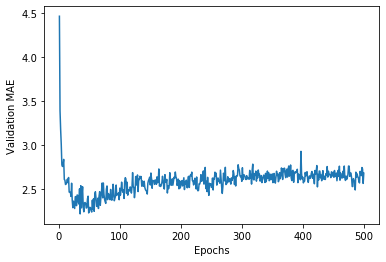

In [16]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

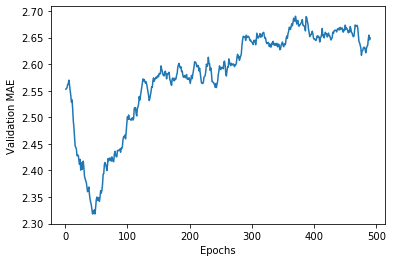

In [17]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [18]:
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 283us/step


In [19]:
 test_mae_score

2.6511735916137695